In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import missingno as msno


# Pre functions

In [ ]:
def find_missing(data):
    count_missing = data.isnull().sum().values
    total = data.shape[0]
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing},\
                         index=data.columns.values).query('missing_ratio>0').sort_values(['missing_ratio'], ascending=False)

# Load Data

In [ ]:
bureau = pd.read_csv('.../dseb63_bureau.csv')
bureau_bal = pd.read_csv('.../dseb63_bureau_balance.csv')

In [ ]:
bureau_copy = bureau.copy()
bureaubal_copy = bureau_bal.copy()

In [ ]:
target = pd.read_csv('.../target.csv')

# Exploratory Data Analysis

## bureau balance

In [ ]:
bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


### Check missing value

In [ ]:
find_missing(bureau_bal)

,missing_count,missing_ratio


### Check duplicated

In [ ]:
bureau_bal.duplicated().sum()

0

### Data labeling

In [ ]:
bureau_bal['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

có 7 giá trị: C(Closed), X(Unknown), 0,1,2,3,4,5(lần lượt là 0-DPD, 1-DPD,...)

### Univariate Analysis

#### MONTHS_BALANCE

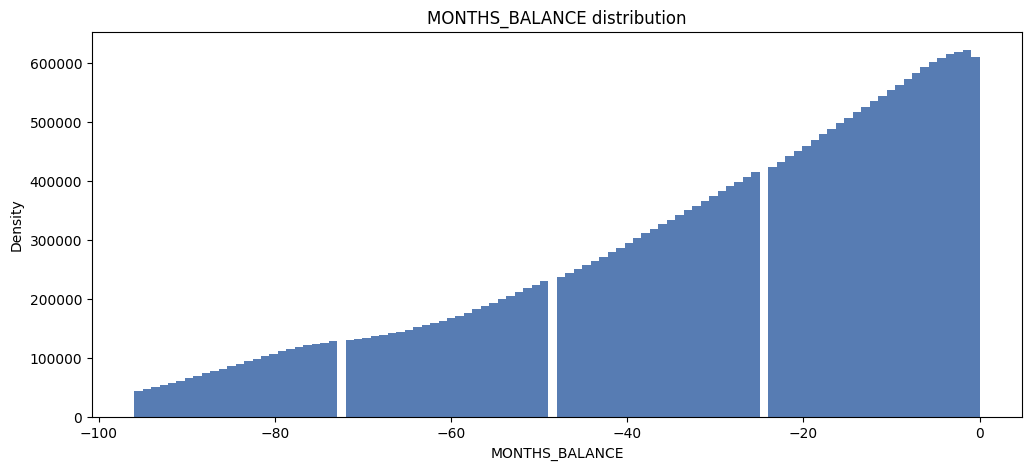

In [ ]:
# Plot MONTHS_BALANCE
plt.figure(figsize=(12, 5))
sns.histplot(bureau_bal['MONTHS_BALANCE'], color = "#1F509A",linewidth=0, bins=100)
plt.title('MONTHS_BALANCE distribution')
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Density')
plt.show()

- Dữ liệu có xu hướng hướng về giá trị 0. Điều này có nghĩa dữ liệu được tập trung vào thời gian hiện tại. Dữ liệu gần đây được ưu tiêu lưu trữ
- Dữ liệu có lịch sử xa hơn thì được lưu trữ ít hơn.

#### STATUS

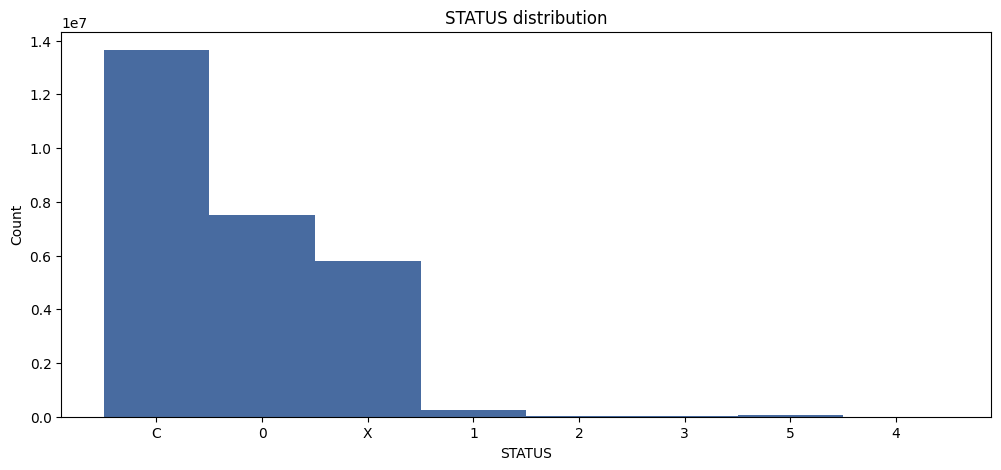

In [ ]:
# Plot STATUS
plt.figure(figsize=(12, 5))
sns.histplot(bureau_bal['STATUS'], color="#0A3981", linewidth=0)
plt.title('STATUS distribution')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.show()

- Đa số các khoản vay đều ở trạng thái Closed, tiếp đó là khoản vay không bị quá hạn (0-DPD) và các khoản vay ở trạng thái UNKNOWN

#### Merge with Target


In [ ]:
# Merge bureau_bal with target
bureaubal_target = bureaubal_copy.copy()
bureaubal_target = bureaubal_target.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on='SK_ID_BUREAU', how='left')
bureaubal_target = bureaubal_target.merge(target, on='SK_ID_CURR', how='left')
bureaubal_target

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,TARGET
0,5715448,0,C,137415.0,0.0
1,5715448,-1,C,137415.0,0.0
2,5715448,-2,C,137415.0,0.0
3,5715448,-3,C,137415.0,0.0
4,5715448,-4,C,137415.0,0.0
...,...,...,...,...,...
27299920,5041336,-47,X,158270.0,1.0
27299921,5041336,-48,X,158270.0,1.0
27299922,5041336,-49,X,158270.0,1.0
27299923,5041336,-50,X,158270.0,1.0


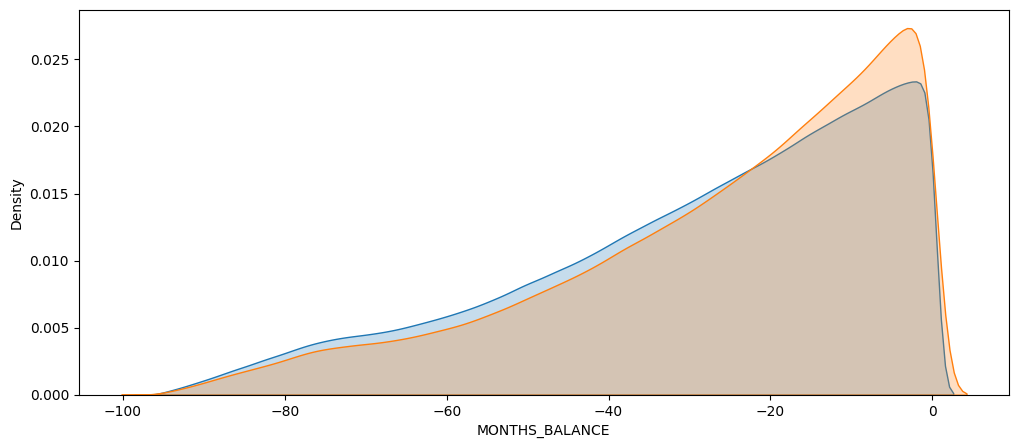

In [ ]:
# Plot MONTHS_BALANCE hue TARGET
plt.figure(figsize=(12, 5))
sns.kdeplot(bureaubal_target.loc[bureaubal_target['TARGET'] == 0, 'MONTHS_BALANCE'], label='target 0', fill=True)
sns.kdeplot(bureaubal_target.loc[bureaubal_target['TARGET'] == 1, 'MONTHS_BALANCE'], label='target 1', fill=True)
plt.show()

## bureau

In [ ]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

In [ ]:
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


### Check missing value

<Axes: >

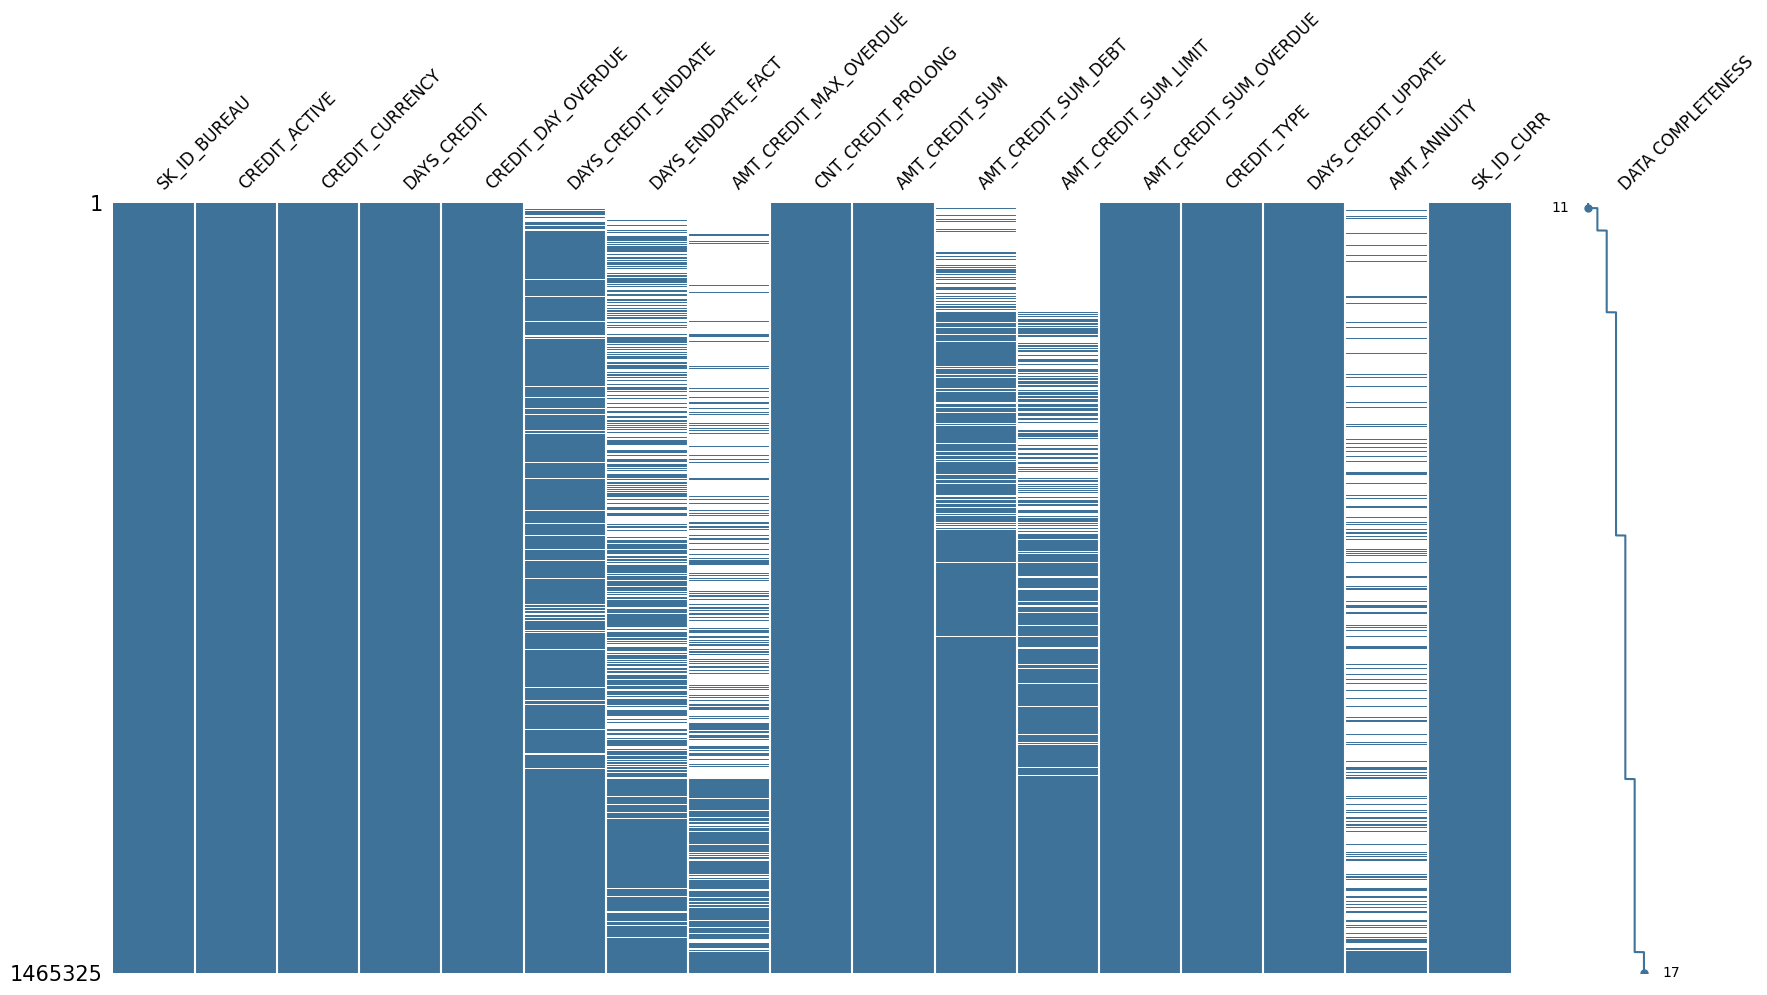

In [ ]:
msno.matrix(bureau, sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color=(0.25, 0.45, 0.6))

In [ ]:
find_missing(bureau)

,missing_count,missing_ratio
AMT_ANNUITY,1130013,0.771169
AMT_CREDIT_MAX_OVERDUE,948545,0.647327
DAYS_ENDDATE_FACT,544673,0.371708
AMT_CREDIT_SUM_LIMIT,489670,0.334172
AMT_CREDIT_SUM_DEBT,223094,0.152249
DAYS_CREDIT_ENDDATE,89098,0.060804
AMT_CREDIT_SUM,3,0.000002


- Cột AMT_ANNUITY có 77% giá trị bị missing theo sau đó là AMT_CREDIT_MAX_OVERDUE là 64%

### Check duplicate

In [ ]:
bureau.duplicated().sum()

0

### Check Outliers

In [ ]:
def calculate_outliers_percentage(df):
    num_cols = df.select_dtypes(include=np.number).columns.to_list()
    num_cols.remove('SK_ID_CURR')
    num_cols.remove('SK_ID_BUREAU')

    outliers_percentage = {}
    for column in num_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_percentage[column] = len(outliers) / len(df) *100
    return outliers_percentage


outliers_percentage = calculate_outliers_percentage(bureau)
outliers_percentage = pd.DataFrame(outliers_percentage.items(), columns=['Column', 'Outliers Percentage'])
outliers_percentage

,Column,Outliers Percentage
0,DAYS_CREDIT,0.000000
1,CREDIT_DAY_OVERDUE,0.252913
2,DAYS_CREDIT_ENDDATE,4.630986
3,DAYS_ENDDATE_FACT,17.004760
4,AMT_CREDIT_MAX_OVERDUE,7.311484
5,CNT_CREDIT_PROLONG,0.601914
6,AMT_CREDIT_SUM,10.995308
7,AMT_CREDIT_SUM_DEBT,25.039496
8,AMT_CREDIT_SUM_LIMIT,4.451640
9,AMT_CREDIT_SUM_OVERDUE,0.248682


### Univariate Analysis

#### Catergorical Features

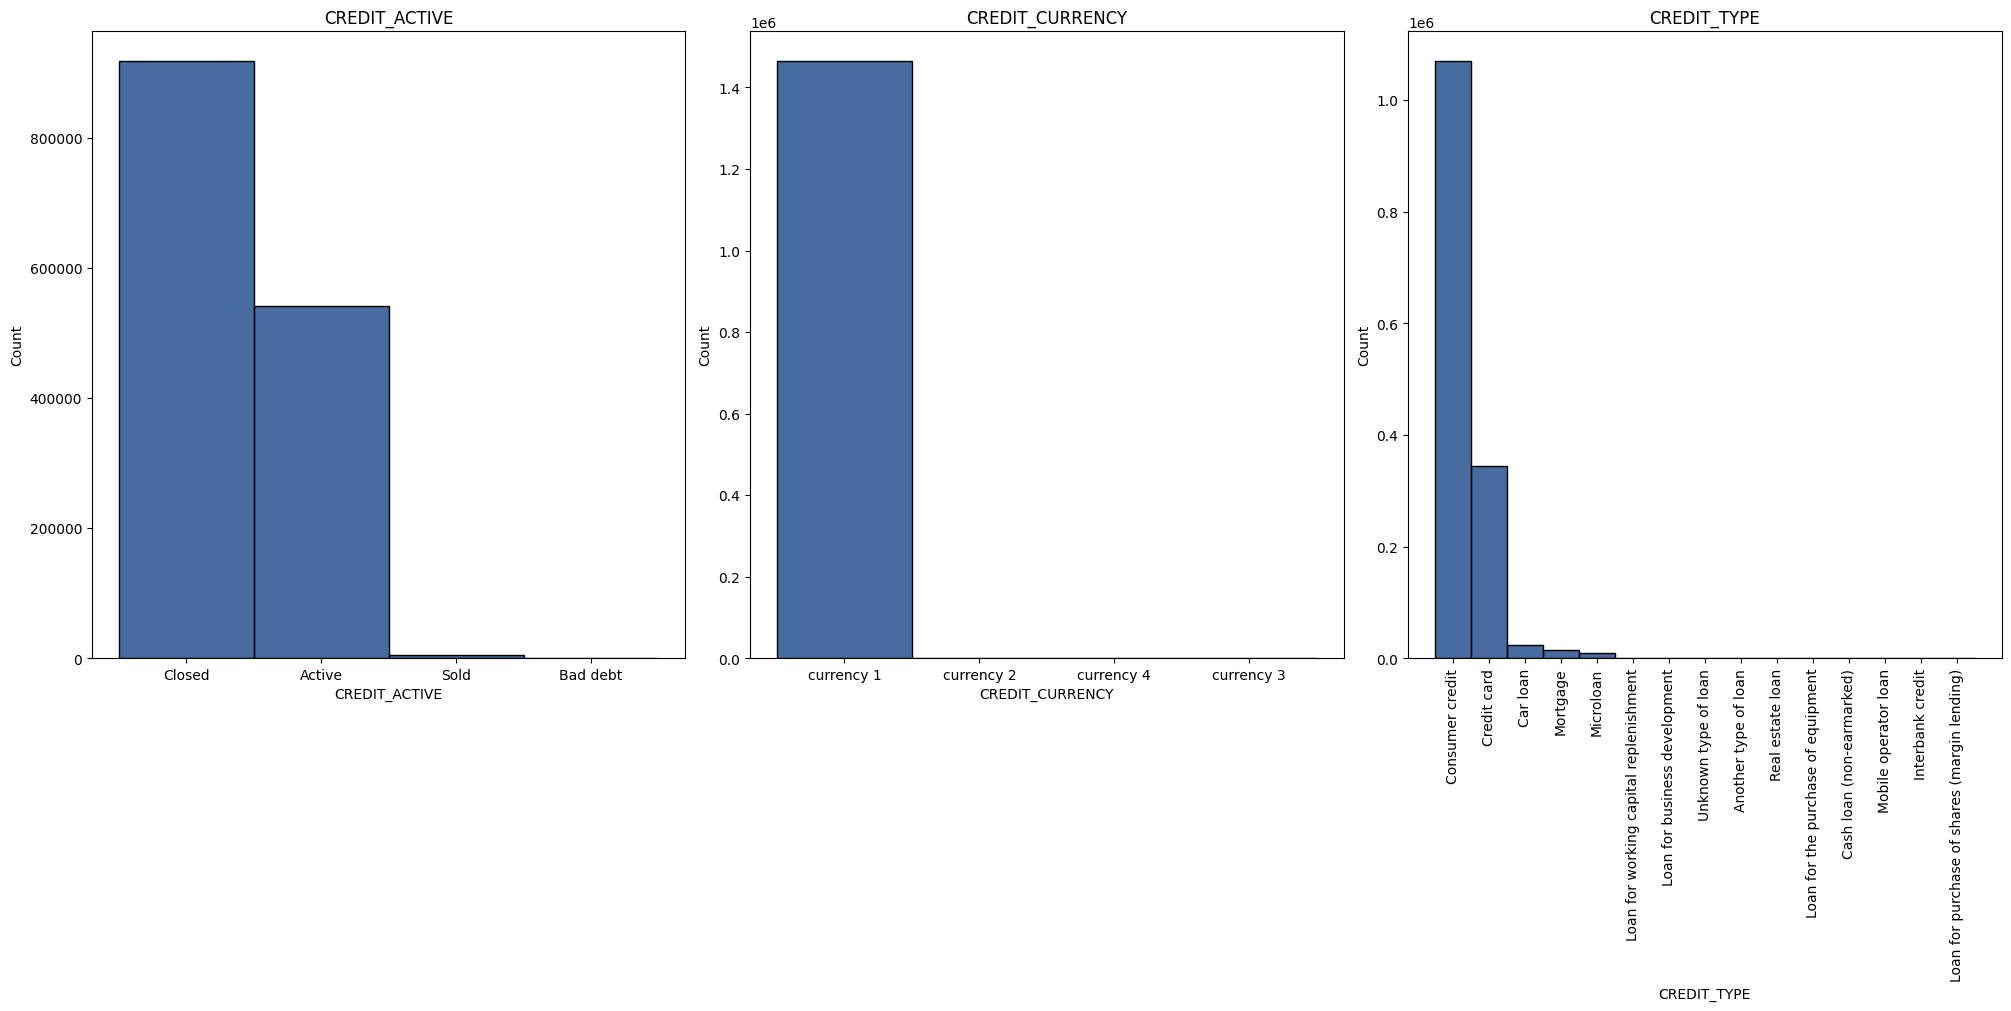

In [ ]:
ncol, nrow = 3, 1
object_columns = bureau.select_dtypes(include=['object'])
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 10), constrained_layout=True)

for ax, column in zip(axes.flatten(), object_columns.columns):
    sns.histplot(bureau[column], color='#0A3981', ax=ax)
    ax.set_title(column)
    if column == 'CREDIT_TYPE':
        ax.set_xticks(range(len(bureau['CREDIT_TYPE'].unique())))
        ax.set_xticklabels(labels=bureau['CREDIT_TYPE'].unique(),rotation=90)

plt.show()

- Các khoản vay đa số có type là Consumer credit và Credit card, có currency 1 và ở trạng thái Closed

In [ ]:
threshold = 0.1
grouped_counts = bureau['CREDIT_ACTIVE'].value_counts()[bureau['CREDIT_ACTIVE'].value_counts()/bureau.shape[0] >= threshold]
others_count = bureau['CREDIT_ACTIVE'].value_counts()[bureau['CREDIT_ACTIVE'].value_counts()/bureau.shape[0] < threshold].sum()
if others_count > 0:
    grouped_counts['Others'] = others_count
grouped_counts = grouped_counts.sort_values(ascending=False)
grouped_counts

CREDIT_ACTIVE
Closed    917733
Active    541919
Others      5673
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of CREDIT_ACTIVE')

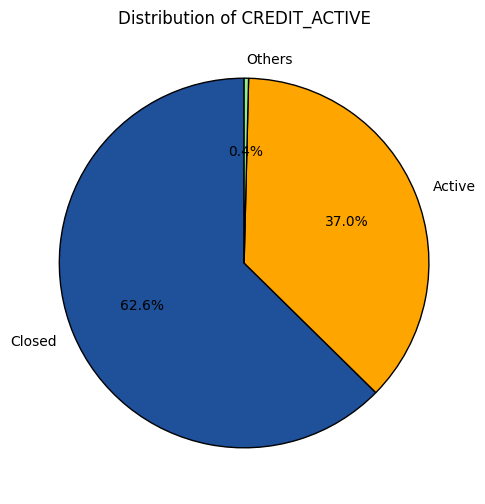

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(
    grouped_counts,
    labels=grouped_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1F509A', 'orange', 'lightgreen', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of CREDIT_ACTIVE')

#### Numerical Features

In [ ]:
num_cols = bureau.select_dtypes(include=np.number).columns.to_list()
num_cols.remove('SK_ID_CURR')
num_cols.remove('SK_ID_BUREAU')

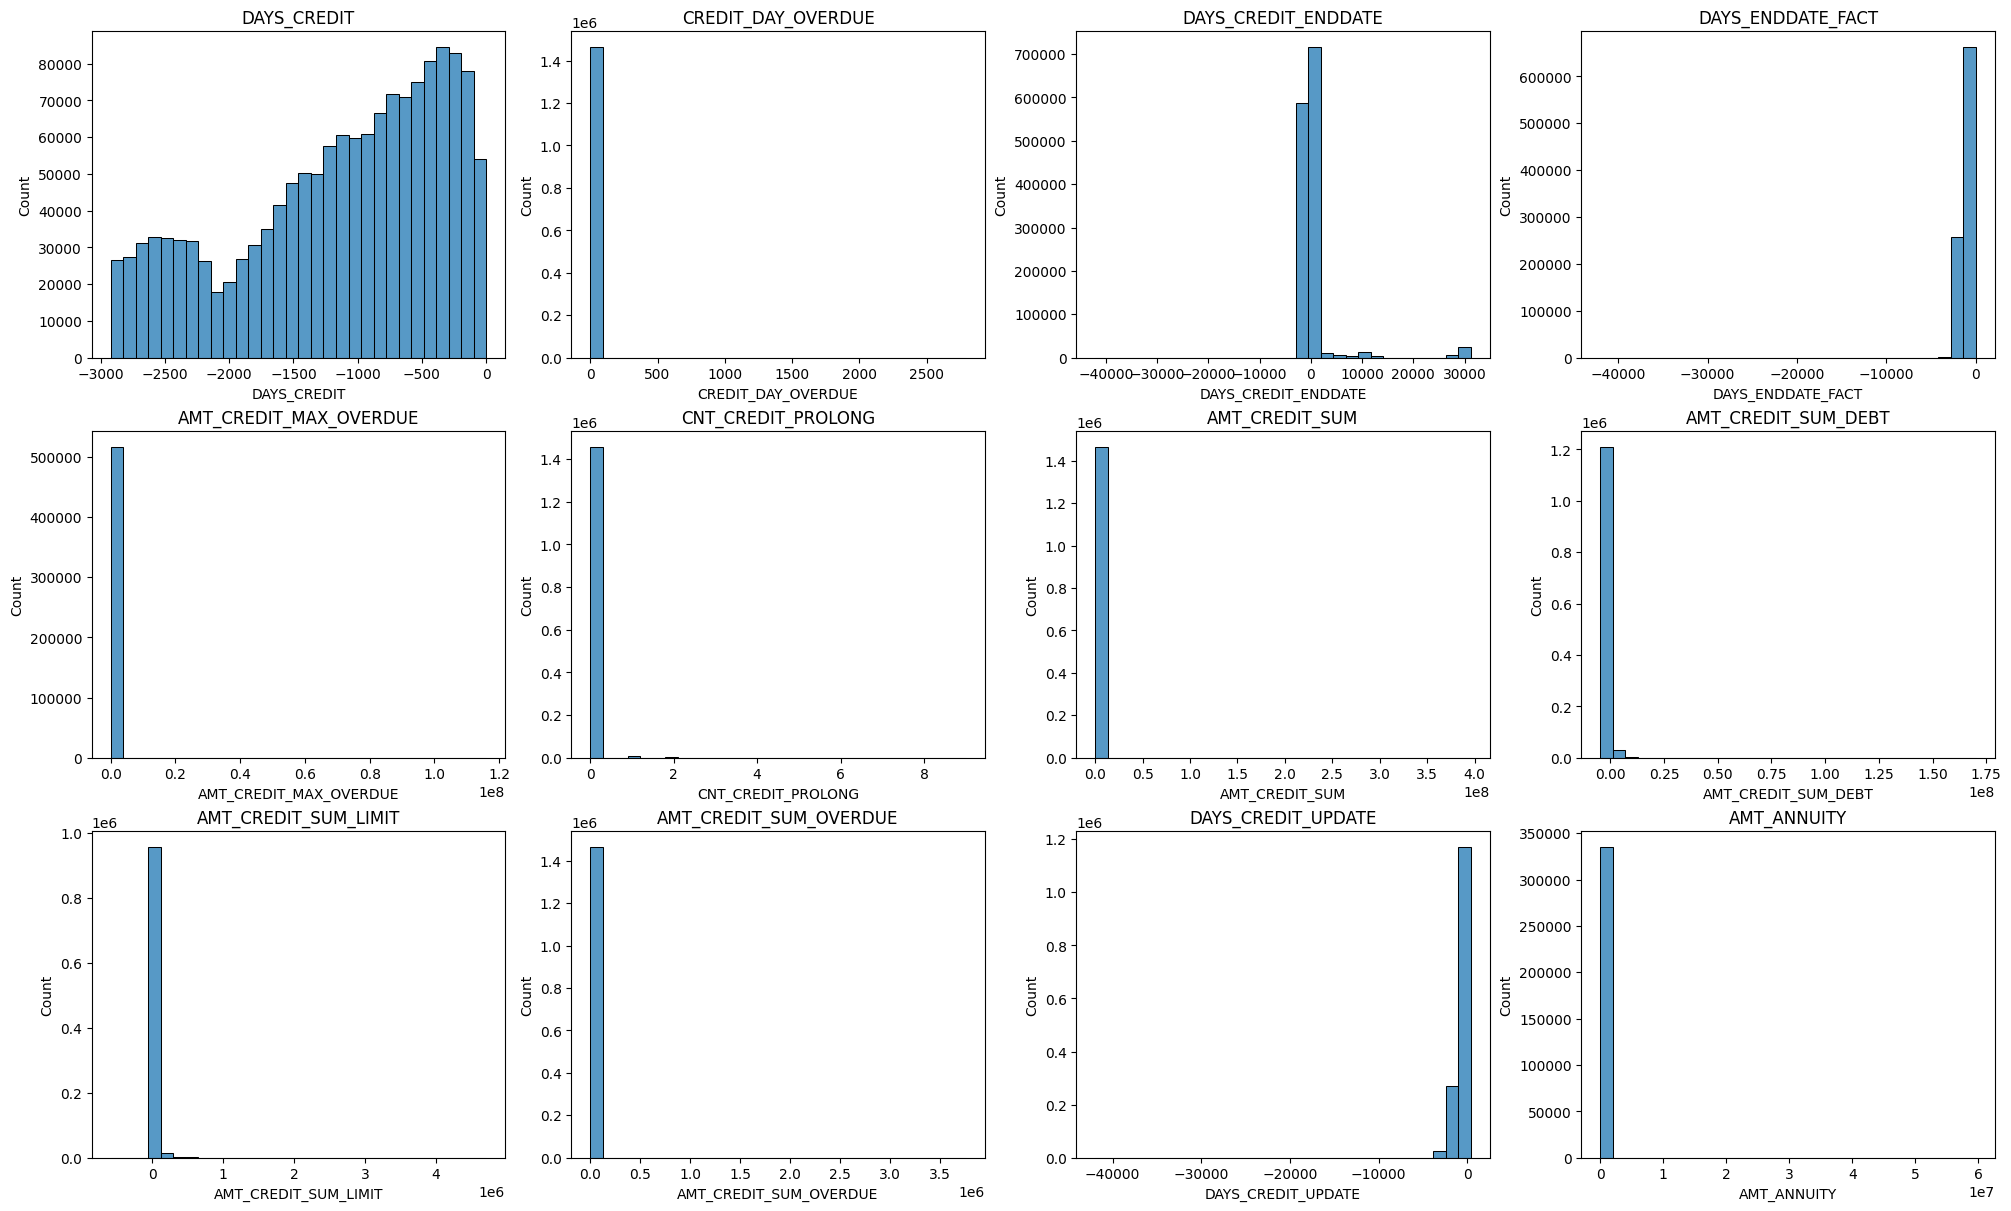

In [ ]:
# Plot histogram of numerical columns
ncol, nrow = 4, len(num_cols) // 5 + 1
fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(num_cols)), constrained_layout=True)

for ax, column in zip(axes.flatten(), num_cols):
    sns.histplot(bureau[column].dropna(), color='', bins=30, kde=False, ax=ax)
    ax.set_title(column)

plt.show()

##### CREDIT_DAY_OVERDUE

Đa số khoản vay đều thuộc loại 0-DPD vì biểu đồ tập trung dữ liệu về 0

In [ ]:
np.round(bureau[bureau['CREDIT_DAY_OVERDUE']>0].shape[0]/bureau.shape[0],3)

0.003

chỉ có khoảng 0.03 phần trăm giá trị là khác 0

Zoom in khoảng giá từ 99.7th và 100th percentiles

In [ ]:
z = PrettyTable()
z.field_names = ["Percentile", "No. of days past due on CB Credit"]

for i in np.arange(99.7,100,0.05):
    z.add_row(np.round([i,np.percentile(bureau['CREDIT_DAY_OVERDUE'].values,i)],2))
z.add_row([100,np.percentile(bureau['CREDIT_DAY_OVERDUE'].values,100)])
print(z)

+------------+-----------------------------------+
| Percentile | No. of days past due on CB Credit |
+------------+-----------------------------------+
|    99.7    |                0.0                |
|   99.75    |                3.69               |
|    99.8    |                15.0               |
|   99.85    |                30.0               |
|    99.9    |                59.0               |
|   99.95    |               533.03              |
|    100     |               2792.0              |
+------------+-----------------------------------+


##### DAYS_CREDIT_ENDDATE

In [ ]:
bureau['DAYS_CREDIT_ENDDATE'].describe()

count    1.376227e+06
mean     4.931322e+02
std      4.964905e+03
min     -4.206000e+04
25%     -1.144000e+03
50%     -3.340000e+02
75%      4.730000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

=> lịch sử ghi cả những giao dịch từ 100 năm trước

##### DAYS_ENDDATE_FACT

In [ ]:
bureau['DAYS_ENDDATE_FACT'].describe()

count    920652.000000
mean      -1022.765286
std         718.371749
min      -42023.000000
25%       -1503.000000
50%        -900.000000
75%        -427.000000
max           0.000000
Name: DAYS_ENDDATE_FACT, dtype: float64

min ở đây là 42023 ngày trước khoảng 115 năm trước.

##### DAYS_CREDIT_UPDATE

In [ ]:
bureau['DAYS_CREDIT_UPDATE'].describe()

count    1.465325e+06
mean    -5.997869e+02
std      7.371010e+02
min     -4.194700e+04
25%     -9.040000e+02
50%     -4.060000e+02
75%     -3.300000e+01
max      3.720000e+02
Name: DAYS_CREDIT_UPDATE, dtype: float64

có cả khoản vay được cập nhật lần cuối là 115 năm trước.

### Bivariate Analysis

#### Merge with target

In [ ]:
bureau_target = bureau_copy.copy()
bureau_target = bureau_target.merge(target, how='left', on='SK_ID_CURR')
bureau_target.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR,TARGET
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629,0.0
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629,0.0
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629,0.0
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629,0.0
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629,0.0


#### Correlation Matrix

##### Numerical Columns

In [ ]:
#numerical columns
bureau_target_cols = bureau_target.select_dtypes(include=np.number).columns.to_list()
bureau_target_cols.remove('SK_ID_CURR')
bureau_target_cols.remove('SK_ID_BUREAU')


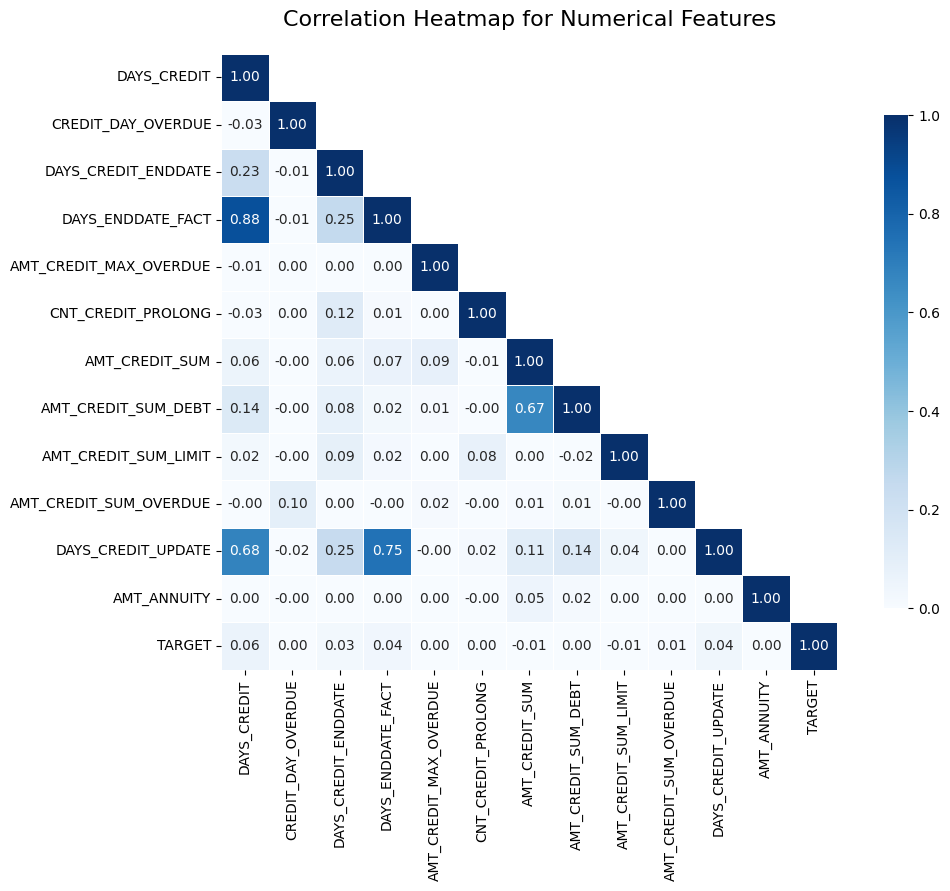

In [ ]:
# Plot correlation matrix with numerical columns
corr_matrix = bureau_target[bureau_target_cols].corr()

# Create a mask to display only one triangle (upper triangle) of the matrix
mask = ~np.tril(np.ones(corr_matrix.shape, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,mask=mask, annot=True, fmt='.2f',  cmap='Blues',  vmax=1.0,
            vmin=0.0, cbar_kws={"shrink": 0.8}, linewidths=0.5, square=True)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16, pad=20)
plt.show()

Các cặp feature có hệ số tương quan cao => Tạo feature các cặp này, hoặc xoá 1 trong 2
- DAYS_CREDIT and DAYS_CREDIT_UPDATE
- DAYS_ENDDATE_FACT and DAYS_CREDIT_UPDATE
- AMT_CREDIT_SUM and AMT_CREDIT_SUM_DEBT
- DAYS_ENDDATE_FACT and DAYS_CREDIT

##### Catergorical columns

In [ ]:
from phik import phik_matrix

interval columns not set, guessing: ['TARGET']


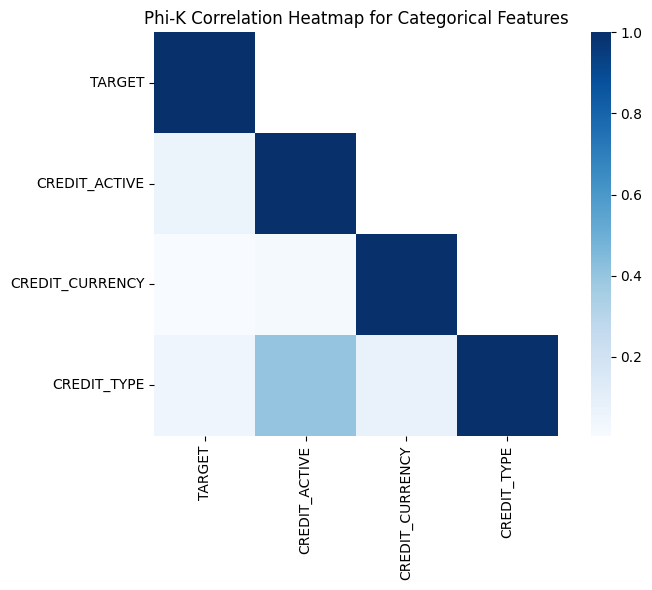

In [ ]:
#categorical columns
cols_for_phik = ['TARGET','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
phik_matrix = bureau_target[cols_for_phik].phik_matrix()

mask = np.triu(np.ones_like(phik_matrix, dtype=bool),k=1)
plt.figure(figsize=(8, 6))
sns.heatmap(
    phik_matrix,
    mask=mask,  # Masking to match the triangular style
    cmap="Blues",
    annot=False,  # Remove annotations for visual similarity
    cbar=True,
    square=True
)
plt.title("Phi-K Correlation Heatmap for Categorical Features")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- CREDIT_TYPE có mối tương quan với CREDIT_ACTIVE